You are provided with two three class dataset namely linearly separable and non-linearly separable. Learn a Naive Bayes classifier for both the dataset separately and report your results with observation as mentioned below. Assume data follows gaussian distribution. Data points are two dimensional.

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix

## Code for Gaussian Naive Bayes Classifier

In [440]:
# defining gaussian class
class Gaussian():
    # intitialize a constructor
    def __init__(self):
        pass

    # function to fit the model
    def fit_model(self, X, y):
        # seaparating the data based on the class labels
        separated = [[point for point, category in zip(X, y) if category == label] for label in np.unique(y)]
        # finding meand and standard deviation
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)]
                    for i in separated])
        return self
    
    # finding the probability
    def probability(self, x, mean, std_dev):
        exponent = np.exp(- ((x - mean)**2 / (2 * std_dev**2)))
        result=np.log(exponent / (np.sqrt(2 * np.pi) * std_dev))
        return result
    
    
    # predicting for data
    def predict(self, X):
        return np.argmax([[sum(self.probability(i, *mean_std) for mean_std, i in zip(summaries, x))
                for summaries in self.model] for x in X], axis=1)
    
    # calculation the score
    def accuracy_score(self, X, y):
        score=sum(self.predict(X) == y) / len(y)
        return score

# LINEARLY SEPARABLE DATASET

In [441]:
# reading class label 1 training data
df1=pd.read_csv('class1_train.txt',header=None)
df1.head()

,0
0,0.22315 -0.021698
1,-0.62173 2.9335
2,-0.98655 -1.0069
3,-2.3567 4.3154
4,-0.31071 2.5497


In [442]:
# reading class label 2 training data
df2=pd.read_csv('class2_train.txt',header=None)
df2.head()

,0
0,9.4702 11.239
1,11.116 10.653
2,12.548 11.56
3,12.088 10.969
4,11.575 9.7832


In [443]:
# reading class label 3 training data
df3=pd.read_csv('class3_train.txt',header=None)
df3.head()


,0
0,11.332 -7.1345
1,11.574 -7.8834
2,9.5646 -8.4623
3,13.735 -4.4125
4,13.408 -7.0876


In [444]:
# reading class label 1 test data
test_df1=pd.read_csv('linearly_seperable\class1_test.txt',header=None)
test_df1.head()

,0
0,0.79642 -0.56184
1,-0.58534 0.31038
2,1.2851 -3.0689
3,-0.30204 0.47625
4,0.46954 -0.092999


In [445]:
# reading class label 2 test data
test_df2=pd.read_csv('linearly_seperable\class2_test.txt',header=None)
test_df2.head()

,0
0,8.1693 9.9322
1,11.476 10.37
2,12.863 9.9767
3,9.3455 12.13
4,8.2528 10.652


In [446]:
# reading class label 3 test data
test_df3=pd.read_csv('linearly_seperable\class3_test.txt',header=None)
test_df3.head()

,0
0,12.462 -7.8873
1,11.252 -7.1395
2,7.5973 -13.816
3,8.4997 -8.8071
4,11.533 -7.9426


In [447]:
# storing the points from the training dataframes in a 2-D array
X1=[]
for i in df1[0]:
    lst=i.split(' ')
    #print(lst)
    X1.append([float(lst[0]),float(lst[1])])
    
X2=[]
for i in df2[0]:
    lst=i.split(' ')
    #print(lst)
    X2.append([float(lst[0]),float(lst[1])])

X3=[]
for i in df3[0]:
    lst=i.split(' ')
    #print(lst)
    X3.append([float(lst[0]),float(lst[1])])

In [448]:
# creating class labels for each training data
y1_train=[0]*len(x1)
y2_train=[1]*len(x2)
y3_train=[2]*len(x3)

In [449]:
# storing the points from the test dataframes in a 2-D array
test_X1=[]
for i in test_df1[0]:
    lst=i.split(' ')
    #print(lst)
    test_X1.append([float(lst[0]),float(lst[1])])
    
test_X2=[]
for i in test_df2[0]:
    lst=i.split(' ')
    #print(lst)
    test_X2.append([float(lst[0]),float(lst[1])])

test_X3=[]
for i in test_df3[0]:
    lst=i.split(' ')
    #print(lst)
    test_X3.append([float(lst[0]),float(lst[1])])

In [453]:
# creating class labels for each test data
y1_test=[0]*len(test_X1)
y2_test=[1]*len(test_X2)
y3_test=[2]*len(test_X3)

In [454]:
# combining all the data
X_train=np.array(X1+X2+X3)

In [455]:
# combining all the labels
y_train=np.array(y1_train+y2_train+y3_train)

In [456]:
# combining all test data
X_test=np.array(test_X1+test_X2+test_X3)

In [457]:
# combining all test labels
y_test=np.array(y1_test+y2_test+y3_test)

In [458]:
# calling the gaussian class
new_model=Gaussian()

# fitting the model with training data
new_model.fit_model(X_train,y_train)

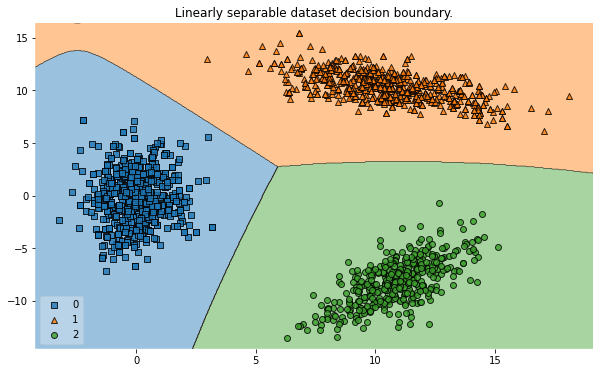

In [459]:
# defining the sice of the figure
plt.figure(figsize=(10,6))

# plotting the decision boundary for the training data
plot_decision_regions(X_train,y_train,clf=new_model,legend=3)

plt.title('Linearly separable dataset decision boundary.')

# showing the plot
plt.show()

In [460]:
# calculating the accuracy score for the training data
print('Accuracy Score for the Train Data:- ',new_model.accuracy_score(X_train,y_train))

Accuracy Score for the Train Data:-  1.0


In [461]:
print('Accuracy Score for the Test Data:- ',new_model.accuracy_score(X_test,y_test))

Accuracy Score for the Test Data:-  1.0


In [462]:
print('Confusion matrix for Train Data:- ')
confusion_matrix(y_train,new_model.predict(X_train))

Confusion matrix for Train Data:- 


array([[650,   0,   0],
       [  0, 650,   0],
       [  0,   0, 400]], dtype=int64)

In [463]:
print('Confusion matrix for Test Data:- ')
confusion_matrix(y_test,new_model.predict(X_test))

Confusion matrix for Test Data:- 


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

<b>Observation</b>

the decision boundary for the linearly dependent dataset is linear.

# NON LINEARLY SEPARABLE

In [464]:
# reading class label 1 training data
data1=pd.read_csv('non_linearly_separable\class1_train.txt',header=None)
data1.head()


,0
0,0.048798 0.37362
1,-0.18176 0.13342
2,-0.025269 -0.052231
3,0.74487 0.1391
4,0.077087 0.54539


In [465]:
# reading class label 2 training data
data2=pd.read_csv('non_linearly_separable\class2_train.txt',header=None)
data2.head()

,0
0,-1.9411 -0.17251
1,-0.99098 -1.3337
2,-0.31998 1.6535
3,1.7951 0.67645
4,1.6554 -0.76927


In [466]:
# reading class label 3 training data
data3=pd.read_csv('non_linearly_separable\class3_train.txt',header=None)
data3.head()

,0
0,2.9854 0.68723
1,-2.2608 -1.4912
2,3.1043 0.57452
3,-2.5302 1.4384
4,2.8565 -1.0506


In [467]:
# reading class label 1 test data
test_data1=pd.read_csv('non_linearly_separable\class1_test.txt',header=None)
test_data1.head()

,0
0,0.73009 0.078425
1,0.074469 -0.61517
2,0.68417 -0.003052
3,0.34958 0.36088
4,-0.72753 0.24602


In [468]:
# reading class label 2 test data
test_data2=pd.read_csv('non_linearly_separable\class2_test.txt',header=None)
test_data2.head()

,0
0,1.1193 -1.0849
1,1.1588 -1.1521
2,0.66555 1.5169
3,-0.5034 -1.767
4,-1.3497 1.2245


In [470]:
# reading class label 3 test data
test_data3=pd.read_csv('non_linearly_separable\class3_test.txt',header=None)
test_data3.head()

,0
0,1.7479 -2.3017
1,-0.75973 -2.7761
2,-2.7391 -1.3874
3,1.375 2.2578
4,2.664 -1.2985


In [471]:
# storing the points from the training dataframes in a 2-D array
n_X1=[]
for i in data1[0]:
    lst=i.split(' ')
    n_X1.append([float(lst[0]),float(lst[1])])
    
n_X2=[]
for i in data2[0]:
    lst=i.split(' ')
    n_X2.append([float(lst[0]),float(lst[1])])

n_X3=[]
for i in data3[0]:
    lst=i.split(' ')
    n_X3.append([float(lst[0]),float(lst[1])])

In [472]:
# creating class labels for each training data
n_y1=[0]*len(data1)
n_y2=[1]*len(data2)
n_y3=[2]*len(data3)

In [473]:
# combining all the data
n_X_train=np.array(n_X1+n_X2+n_X3)

In [474]:
# combining all the labels
n_y_train=np.array(n_y1+n_y2+n_y3)

In [475]:
# storing the points from the test dataframes in a 2-D array
n_test_X1=[]
for i in test_data1[0]:
    lst=i.split(' ')
    #print(lst)
    n_test_X1.append([float(lst[0]),float(lst[1])])
    
n_test_X2=[]
for i in test_data2[0]:
    lst=i.split(' ')
    #print(lst)
    n_test_X2.append([float(lst[0]),float(lst[1])])

n_test_X3=[]
for i in test_data3[0]:
    lst=i.split(' ')
    #print(lst)
    n_test_X3.append([float(lst[0]),float(lst[1])])

In [476]:
# creating class labels for each test data
n_y1_test=[0]*len(n_test_X1)
n_y2_test=[1]*len(n_test_X2)
n_y3_test=[2]*len(n_test_X3)

In [477]:
# combining all the test data
n_X_test=np.array(n_test_X1+n_test_X2+n_test_X3)

In [478]:
# combining all the test labels
n_y_test=np.array(n_y1_test+n_y2_test+n_y3_test)

In [479]:
# calling the gaussian class
n_new_model=Gaussian()

# fitting the model with training data
n_new_model.fit_model(n_X_train,n_y_train)


<b>1) decision region plots learnt by the classifier (Plots should have train data superimposed in the figure and should have proper labelings and title)
</b>

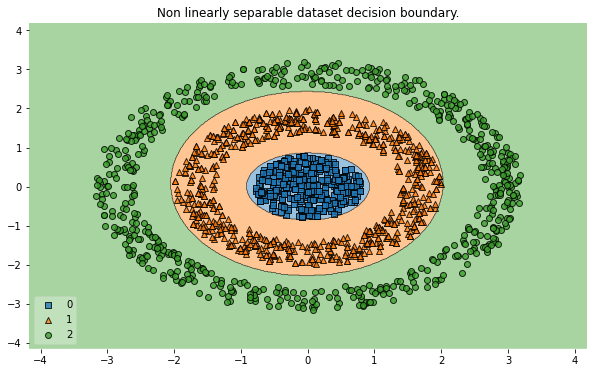

In [480]:
# defining the size of figure
plt.figure(figsize=(10,6))

# plotting the decision boundary for the training data
plot_decision_regions(n_X_train,n_y_train,clf=n_new_model,legend=3)

plt.title('Non linearly separable dataset decision boundary.')
# showing the plot
plt.show()

<b>2)accuracy values for train data and test data</b>

In [481]:
print('Accuracy score for Train Data:- ',n_new_model.accuracy_score(n_X_train,n_y_train))

Accuracy score for Train Data:-  1.0


In [482]:
print('Accuracy score for Test Data:- ',n_new_model.accuracy_score(n_X_test,n_y_test))

Accuracy score for Test Data:-  1.0


<b>3) confusion matrix for train and test data</b>

In [483]:
print('Confusion matrix for Train Data:- ')
confusion_matrix(n_y_train,n_new_model.predict(n_X_train))

Confusion matrix for Train Data:- 


array([[390,   0,   0],
       [  0, 780,   0],
       [  0,   0, 640]], dtype=int64)

In [484]:
print('Confusion matrix for Test Data:- ')
confusion_matrix(n_y_test,n_new_model.predict(n_X_test))

Confusion matrix for Test Data:- 


array([[ 60,   0,   0],
       [  0, 120,   0],
       [  0,   0, 160]], dtype=int64)

<b>Observation</b>

the decision boundary for the non linearly dependent dataset is not linear, it's in the form of a circle.